# Mushroom classification project.

The main task of this project is the implementation from scratch of tree predictors for binary classification to determine whether mushrooms are poisonous. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load the data
data = pd.read_csv('data/secondary_data.csv', delimiter=';')

data.head()

(61069, 21)

veil-type               94.797688
spore-print-color       89.595376
veil-color              87.861272
stem-root               84.393064
stem-surface            62.427746
gill-spacing            41.040462
cap-surface             23.121387
gill-attachment         16.184971
ring-type                4.046243
class                    0.000000
stem-color               0.000000
habitat                  0.000000
has-ring                 0.000000
stem-width               0.000000
cap-diameter             0.000000
stem-height              0.000000
gill-color               0.000000
does-bruise-or-bleed     0.000000
cap-color                0.000000
cap-shape                0.000000
season                   0.000000
dtype: float64


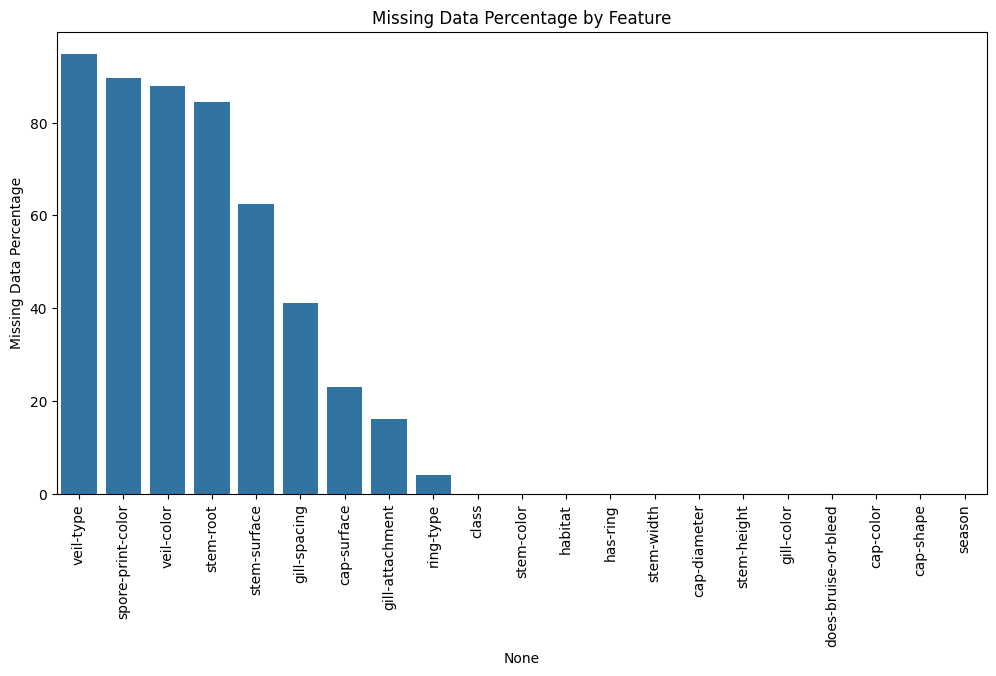

In [17]:
# Calculate the missing data percentages
missing_data_percentage = (data.isnull().sum() / data.shape[0]) * 100

# Sort the missing data percentages in descending order
missing_data_percentage = missing_data_percentage.sort_values(ascending=False)

# Print the sorted missing data percentages
print(missing_data_percentage)

# Visualize the missing data percentages
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_data_percentage.index, y=missing_data_percentage)
plt.xticks(rotation=90)
plt.ylabel('Missing Data Percentage')
plt.title('Missing Data Percentage by Feature')
plt.show()

In [18]:
# Number of data points in the DataFrame
num_data_points = data.shape[0]
print(f'The number of data points in the DataFrame: {num_data_points}')

The number of data points in the DataFrame: 61069


In [19]:
# Dropping columns with too many missing values (more than 80%)
columns_to_drop = ['veil-type', 'spore-print-color', 'veil-color', 'stem-root']
data_cleaned = data.drop(columns=columns_to_drop)

# Checking the first few rows of the cleaned dataset
print(data_cleaned.head())

  class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     p         15.26         x           g         o                    f   
1     p         16.60         x           g         o                    f   
2     p         14.07         x           g         o                    f   
3     p         14.17         f           h         e                    f   
4     p         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  stem-width  \
0               e          NaN          w        16.95       17.09   
1               e          NaN          w        17.99       18.19   
2               e          NaN          w        17.80       17.74   
3               e          NaN          w        15.77       15.98   
4               e          NaN          w        16.53       17.20   

  stem-surface stem-color has-ring ring-type habitat season  
0            y          w        t         g    

In [22]:
# Filling missing values with the most frequent value in the remaining columns
columns_to_fill = ['stem-surface', 'gill-spacing', 'cap-surface', 'gill-attachment', 'ring-type']
for column in columns_to_fill:
    most_frequent_value = data_cleaned[column].mode()[0]  # Finding the most frequent value
    data_cleaned[column].fillna(most_frequent_value, inplace=True)

# Checking again if there are any remaining missing values
print(data_cleaned.isnull().sum())  # Verifying that missing data has been filled

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-surface            0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64


In [23]:
# Converting categorical variables into numerical (One-Hot Encoding)
data_encoded = pd.get_dummies(data_cleaned)

# Checking the first few rows of the encoded dataset
print(data_encoded.head())

   cap-diameter  stem-height  stem-width  class_e  class_p  cap-shape_b  \
0         15.26        16.95       17.09    False     True        False   
1         16.60        17.99       18.19    False     True        False   
2         14.07        17.80       17.74    False     True        False   
3         14.17        15.77       15.98    False     True        False   
4         14.64        16.53       17.20    False     True        False   

   cap-shape_c  cap-shape_f  cap-shape_o  cap-shape_p  ...  habitat_h  \
0        False        False        False        False  ...      False   
1        False        False        False        False  ...      False   
2        False        False        False        False  ...      False   
3        False         True        False        False  ...      False   
4        False        False        False        False  ...      False   

   habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  season_a  season_s  \
0      False      False      F